In [1]:
import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import adam

Using TensorFlow backend.


In [2]:
batch_size = 128
num_classes = 10
epochs = 20

In [3]:
# input image dimensions
img_rows, img_cols = 28, 28

In [4]:
# the data, split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], img_cols, img_rows, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], img_cols, img_rows, 1).astype('float32')
input_shape=(img_cols, img_rows, 1)

In [6]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [7]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [8]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [9]:
# create model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
# Training the neural network
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 7s 130us/step - loss: 0.2585 - acc: 0.9206 - val_loss: 0.0548 - val_acc: 0.9855
Epoch 2/20
54000/54000 [==============================] - 6s 108us/step - loss: 0.0862 - acc: 0.9741 - val_loss: 0.0448 - val_acc: 0.9883
Epoch 3/20
54000/54000 [==============================] - 6s 108us/step - loss: 0.0665 - acc: 0.9792 - val_loss: 0.0370 - val_acc: 0.9893
Epoch 4/20
54000/54000 [==============================] - 6s 108us/step - loss: 0.0509 - acc: 0.9844 - val_loss: 0.0332 - val_acc: 0.9910
Epoch 5/20
54000/54000 [==============================] - 6s 107us/step - loss: 0.0446 - acc: 0.9859 - val_loss: 0.0346 - val_acc: 0.9905
Epoch 6/20
54000/54000 [==============================] - 6s 107us/step - loss: 0.0379 - acc: 0.9882 - val_loss: 0.0333 - val_acc: 0.9912
Epoch 7/20
54000/54000 [==============================] - 6s 108us/step - loss: 0.0331 - acc: 0.9886 - val_loss: 0.0257 - v

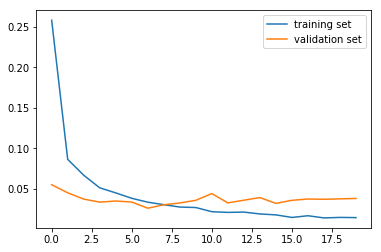

In [11]:
# Visualizing the training loss curves
plt.plot(history.history['loss'], label = "training set")
plt.plot(history.history['val_loss'], label = "validation set")
plt.legend()
plt.show()

In [12]:
# Evaluating on the Test Set
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0329180591718954
Test accuracy: 0.9915
